# **Assignment 1: “Word Embeddings and Probabilistic Language Models”**
Group 16:   

         
        Xiaoqing Cai 

        Qiaowen Hu  

        Binwu Wang  
        
        Congcong Xu 

## **Task 1: F.R.I.E.N.D.S and  Word2Vec (Grade (2 + 2 + 4) = 8)**

### Subtask 1: Pre-processing


In [1]:
import re
import pandas as pd
from collections import defaultdict
import spacy
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [2]:
df = pd.read_csv('friends_quotes.csv')
df=df[['quote','author']]
### filter out columns ###
df.head(10)

,quote,author
0,There's nothing to tell! He's just some guy I ...,Monica
1,"C'mon, you're going out with the guy! There's ...",Joey
2,"All right Joey, be nice. So does he have a hum...",Chandler
3,"Wait, does he eat chalk?",Phoebe
4,"Just, 'cause, I don't want her to go through w...",Phoebe
5,"Okay, everybody relax. This is not even a date...",Monica
6,Sounds like a date to me.,Chandler
7,"Alright, so I'm back in high school, I'm stand...",Chandler
8,"Oh, yeah. Had that dream.",All
9,"Then I look down, and I realize there's a phon...",Chandler


In [3]:
df.isnull().sum() # check for missing data

quote     0
author    0
dtype: int64

In [4]:
import en_core_web_sm
# nlp = en_core_web_sm.load()
print(df['quote'])

0        There's nothing to tell! He's just some guy I ...
1        C'mon, you're going out with the guy! There's ...
2        All right Joey, be nice. So does he have a hum...
3                                 Wait, does he eat chalk?
4        Just, 'cause, I don't want her to go through w...
                               ...                        
60286                              Oh, it's gonna be okay.
60287    (crying) Do you guys have to go to the new hou...
60288                                    We got some time.
60289                     Okay, should we get some coffee?
60290                                         Sure. Where?
Name: quote, Length: 60291, dtype: object


In [5]:
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser","ner"])#
stopwords = spacy.lang.en.stop_words.STOP_WORDS
df["quote"] = df['quote'].replace('[^a-zA-Z0-9\s]', '', regex=True).str.lower() # lowercase and remove non-alphabetic characters
quotes =[] # to save all the lines
# df["quote"].head()

words_tokenization = []
### Your Code ###
for i in df["quote"]:
    doc = nlp(i)
    # rows=[]
    # cols=('text','lemma','stopword')
    # for t in doc:
    #     row=[t.text,t.lemma_,t.is_stop]
    #     rows.append(row)
    # df1=pd.DataFrame(rows,columns=cols)
    # print(df1)
    # print(type(doc))
    # print(len(doc))
    word_length = 0
    filter_result = []
    for word in doc:
        if not word.is_stop and len(word.text)!=1:
            filter_result.append(word.text.strip())
            word_length += 1
    # print(filter_result)
    if word_length<4:
        continue
    final_result=' '.join(filter_result)
    quotes.append(final_result)

/Users/huqiaowen/Library/Python/3.8/lib/python/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [6]:
print(quotes)

['cmon going guy got ta wrong', 'right joey nice hump hump hairpiece', 'cause nt want went carl oh', 'okay everybody relax date people going dinner having sex', 'alright high school standing middle cafeteria realize totally naked', 'sudden phone starts ring nt know everybody starts looking', 'finally figure better answer turns mother veryvery weird calls', 'guy says hello wanna kill', 'feel like reached throat grabbed small intestine pulled mouth tied neck', 'explaining carol moved stuff today', 'ooh oh starts pluck air ross', 'nt stop cleansing aura leave aura okay', 'ill fine alright hope shell happy', 'okay fixating nt know know', 'wish lesbian stare loud', 'told mom dad night pretty', 'oh hysterical phone got woman sobbing 300 ill grandchildren ill grandchildren wrong number', 'alright ross look feeling lot pain right angry hurting tell answer', 'strip joint cmon single hormones', 'nt want single okay wanna married', 'want million dollars extends hand hopefully', 'oh god monica hi 

In [7]:
from gensim.models.phrases import Phrases
words = [x.split() for x in quotes]+[x.lower().split() for x in df['author']]#list of all words#
phrases = Phrases(words, min_count=10)#define the phraser for bi-gram creation#
new_lines = [phrases[quote.split()] for quote in quotes]#transform the lines#

INFO - 23:12:28: collecting all words and their counts
INFO - 23:12:28: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 23:12:28: PROGRESS: at sentence #10000, processed 84306 words and 63599 word types
INFO - 23:12:28: PROGRESS: at sentence #20000, processed 169384 words and 112510 word types
INFO - 23:12:28: PROGRESS: at sentence #30000, processed 253144 words and 156873 word types
INFO - 23:12:28: PROGRESS: at sentence #40000, processed 267408 words and 159119 word types
INFO - 23:12:28: PROGRESS: at sentence #50000, processed 277887 words and 159195 word types
INFO - 23:12:28: PROGRESS: at sentence #60000, processed 288684 words and 159569 word types
INFO - 23:12:28: PROGRESS: at sentence #70000, processed 299279 words and 159810 word types
INFO - 23:12:28: PROGRESS: at sentence #80000, processed 309971 words and 159915 word types
INFO - 23:12:28: PROGRESS: at sentence #90000, processed 321054 words and 160800 word types
INFO - 23:12:28: collected 160821 token t

In [8]:
# for phrase, score in phrases.find_phrases(words).items():
#     print(phrase, score)
new_lines[:2]

[['cmon', 'going', 'guy', 'got_ta', 'wrong'],
 ['right', 'joey', 'nice', 'hump', 'hump', 'hairpiece']]

In [9]:
### find the top words for the vocabulary###
vocab_dict = defaultdict(int)
for line in new_lines:
    for word in line:
        vocab_dict[word]+=1
result_ordered_vocab = sorted(vocab_dict.items(), key = lambda kv:-kv[1])[:15000]
vocab={k:v for k,v in result_ordered_vocab}###top words ###

In [10]:
result_ordered_vocab=sorted(vocab_dict.items(), key = lambda kv:-kv[1])
vocab={k:v for k,v in result_ordered_vocab}###top words ###

In [11]:
vocab['spaceship']

2

In [12]:
vocab

{'nt': 7332,
 'oh': 4625,
 'know': 3807,
 'okay': 3562,
 'yeah': 2976,
 'right': 2696,
 'like': 2641,
 'gon_na': 2614,
 'yknow': 2086,
 'ross': 2082,
 'hey': 2040,
 'look': 2007,
 'uh': 1943,
 'think': 1878,
 'joey': 1829,
 'mean': 1771,
 'chandler': 1663,
 'rachel': 1519,
 'monica': 1444,
 'want': 1436,
 'come': 1370,
 'guys': 1259,
 'got': 1258,
 'phoebe': 1152,
 'good': 1121,
 'going': 1083,
 'little': 1036,
 'ok': 1033,
 'sorry': 1031,
 'time': 1018,
 'great': 992,
 'tell': 929,
 've': 920,
 'ill': 918,
 'oh_god': 904,
 'guy': 889,
 'thing': 854,
 'love': 806,
 'way': 781,
 'umm': 751,
 'maybe': 737,
 'said': 698,
 'looks': 680,
 'hi': 604,
 'wanna': 595,
 'people': 593,
 'thought': 575,
 'yes': 567,
 'man': 534,
 'need': 518,
 'starts': 517,
 'work': 517,
 'listen': 513,
 'wow': 513,
 'actually': 512,
 'big': 505,
 'sure': 500,
 'lets': 500,
 'let': 499,
 'ii': 488,
 'talk': 485,
 'huh': 474,
 'ah': 471,
 'stuff': 466,
 'baby': 464,
 'um': 460,
 'room': 459,
 'goes': 459,
 'gets':

In [13]:
vocab['central_perk']

34

In [14]:
vocab['joey']

1829

### Subtask 2: Training the Model


1) Set up your model with parameters

In [15]:
from gensim.models import Word2Vec
def hash(astring):
    return ord(astring[0])

In [16]:
### your code ###
w2v = Word2Vec(min_count=2, vector_size=100, workers=1, alpha=0.03, negative=20, window=3, hashfxn=hash, min_alpha=0.0001, sample=6e-5)

INFO - 23:12:29: Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.03>', 'datetime': '2023-11-11T23:12:29.788625', 'gensim': '4.3.2', 'python': '3.8.9 (default, Jul 19 2021, 09:37:32) \n[Clang 13.0.0 (clang-1300.0.27.3)]', 'platform': 'macOS-12.1-x86_64-i386-64bit', 'event': 'created'}


2) Before training, Word2Vec requires us to build the vocabulary table by filtering out the unique words and doing some basic counts on them.
Use the `build_vocab` function to process the data. If you look at the logs you can see the effect of `min_count` and `sample` on the word corpus.

In [17]:
vocab_list = list(vocab.keys())
new_sentences_list = []
for line_num, line in enumerate(new_lines):
    new_list = []
    for word_num, word in enumerate(line,-1):
        if word in vocab_list:
            new_list.append(word)
    new_sentences_list.append(new_list)
# new_sentences_list = new_lines
w2v.build_vocab(new_sentences_list)

INFO - 23:12:40: collecting all words and their counts
INFO - 23:12:40: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 23:12:40: PROGRESS: at sentence #10000, processed 81019 words, keeping 9951 word types
INFO - 23:12:40: PROGRESS: at sentence #20000, processed 162942 words, keeping 14044 word types
INFO - 23:12:40: PROGRESS: at sentence #30000, processed 243535 words, keeping 17652 word types
INFO - 23:12:40: collected 17773 word types from a corpus of 247342 raw words and 30504 sentences
INFO - 23:12:40: Creating a fresh vocabulary
INFO - 23:12:40: Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 9291 unique words (52.28% of original 17773, drops 8482)', 'datetime': '2023-11-11T23:12:40.947747', 'gensim': '4.3.2', 'python': '3.8.9 (default, Jul 19 2021, 09:37:32) \n[Clang 13.0.0 (clang-1300.0.27.3)]', 'platform': 'macOS-12.1-x86_64-i386-64bit', 'event': 'prepare_vocab'}
INFO - 23:12:40: Word2Vec lifecycle event {'msg': 'effective_min_count=2 

3) Finally, we  train the model. Train the model for 100 epochs. This will take a while. As we do not plan to train the model any further, we call `init_sims()`, which will make the model much more memory-efficient by precomputing L2-norms of word weight vectors for further analysis.

In [18]:
w2v.init_sims()
w2v.train(new_sentences_list, epochs=100, total_examples=len(new_sentences_list))

/var/folders/4z/f2_g5qg515z9dlcvpcfd5nh00000gn/T/ipykernel_21651/1627359006.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v.init_sims()
INFO - 23:12:41: Word2Vec lifecycle event {'msg': 'training model with 1 workers on 9291 vocabulary and 100 features, using sg=0 hs=0 sample=6e-05 negative=20 window=3 shrink_windows=True', 'datetime': '2023-11-11T23:12:41.182798', 'gensim': '4.3.2', 'python': '3.8.9 (default, Jul 19 2021, 09:37:32) \n[Clang 13.0.0 (clang-1300.0.27.3)]', 'platform': 'macOS-12.1-x86_64-i386-64bit', 'event': 'train'}
INFO - 23:12:41: EPOCH 0: training on 247342 raw words (112081 effective words) took 0.5s, 206398 effective words/s
INFO - 23:12:42: EPOCH 1: training on 247342 raw words (112030 effective

INFO - 23:13:19: EPOCH 64: training on 247342 raw words (112146 effective words) took 0.5s, 223245 effective words/s
INFO - 23:13:19: EPOCH 65: training on 247342 raw words (112362 effective words) took 0.5s, 220175 effective words/s
INFO - 23:13:20: EPOCH 66: training on 247342 raw words (112198 effective words) took 0.5s, 219369 effective words/s
INFO - 23:13:20: EPOCH 67: training on 247342 raw words (112285 effective words) took 0.6s, 192183 effective words/s
INFO - 23:13:21: EPOCH 68: training on 247342 raw words (111952 effective words) took 0.5s, 217061 effective words/s
INFO - 23:13:21: EPOCH 69: training on 247342 raw words (112024 effective words) took 0.5s, 212392 effective words/s
INFO - 23:13:22: EPOCH 70: training on 247342 raw words (112133 effective words) took 0.5s, 217564 effective words/s
INFO - 23:13:22: EPOCH 71: training on 247342 raw words (111776 effective words) took 0.5s, 213833 effective words/s
INFO - 23:13:23: EPOCH 72: training on 247342 raw words (112200 

(11208211, 24734200)

### Subtask 3: Exploring the Model


In [19]:
word1 = 'central_perk'
word2 = 'joey'
model_word1=w2v.wv.most_similar(word1,topn=30)
print(model_word1)

[('itscene', 0.6070916652679443), ('conan', 0.5347036719322205), ('mitzi', 0.5147010684013367), ('hippityhop', 0.4913429319858551), ('thatscene', 0.46851903200149536), ('sitting_couch', 0.46312740445137024), ('rehearsing', 0.4568374454975128), ('aaah', 0.44667449593544006), ('language', 0.44126126170158386), ('laying', 0.43810680508613586), ('bursts', 0.43753695487976074), ('mmhmm', 0.43448367714881897), ('grownups', 0.42454203963279724), ('bagels', 0.4046802222728729), ('min', 0.3957327902317047), ('intrigued', 0.39441582560539246), ('beverage', 0.39021381735801697), ('basic', 0.38921406865119934), ('corner', 0.3816630244255066), ('shhhh', 0.38083332777023315), ('erogenous', 0.3800717890262604), ('cabana', 0.37666237354278564), ('terrys', 0.37574630975723267), ('orgy', 0.3749626874923706), ('burp', 0.36860278248786926), ('russ', 0.36560744047164917), ('uhhh', 0.36492660641670227), ('egypt', 0.3508843183517456), ('hump', 0.34759101271629333), ('peek', 0.34568265080451965)]


In [20]:
model_word2=w2v.wv.most_similar(word2,topn=30)
print(model_word2)

[('chandler', 0.741244912147522), ('monica', 0.6610130667686462), ('rachel', 0.6172913908958435), ('phoebe', 0.6056169867515564), ('ross', 0.5594348311424255), ('hey', 0.5382033586502075), ('looks', 0.537649929523468), ('goes', 0.5286955833435059), ('oh', 0.5207914113998413), ('look', 0.5135347247123718), ('turns', 0.5064370036125183), ('walks_away', 0.5033183097839355), ('sees', 0.49482351541519165), ('ecstatic', 0.48555999994277954), ('thatscene', 0.4801963269710541), ('guys', 0.47747930884361267), ('right', 0.4724567234516144), ('tighter', 0.46945950388908386), ('smiles', 0.4650184214115143), ('sips', 0.4546903073787689), ('instantly', 0.44481101632118225), ('gets', 0.43963339924812317), ('disturb', 0.4351747930049896), ('walks', 0.43422138690948486), ('ahhhh', 0.4312889575958252), ('papa', 0.4283478558063507), ('leaves', 0.4258209764957428), ('hugs', 0.4201624393463135), ('erin', 0.4179913103580475), ('janines', 0.4139730930328369)]


In [21]:
distance_cp_joey = w2v.wv.similarity(word1,word2)
print(distance_cp_joey)

0.14690953


In [22]:
word3 = 'green'
word4 = 'rachel'
distance_green_rachel = w2v.wv.similarity(word3,word4)
print(distance_green_rachel)

0.29996765


In [23]:
word5 = 'ross'
word6 = 'spaceship'
distance_ross_spaceship = w2v.wv.similarity(word5,word6)
print(distance_ross_spaceship)

-0.18148112


In [24]:
word7 = 'smelly_cat'
word8 = 'song'
distance_smelly_cat_song = w2v.wv.similarity(word7,word8)
print(distance_smelly_cat_song)

0.48844048


In [25]:
character_names= ['joey', 'rachel', 'phoebe','monica','chandler']

In [26]:
w2v.wv.doesnt_match(character_names)

'joey'

In [27]:
w2v.wv.most_similar('monica',topn=3)

[('chandler', 0.7754167318344116),
 ('rachel', 0.7675455808639526),
 ('phoebe', 0.7269484996795654)]

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
from sklearn.manifold import TSNE

In [29]:
def tsneplot(model, word):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction for the top 10 most similar and dissimilar words
    """
    embs = np.empty((0, 100), dtype='f')# to save all the embeddings
    word_labels = [word]
    color_list  = ['green']

    # adds the vector of the query word
    embs = np.append(embs, model.wv.__getitem__([word]), axis=0)

    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    all_sims = model.wv.most_similar([word], topn=sys.maxsize)
    far_words = list(reversed(all_sims[-10:]))

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        embs = np.append(embs, wrd_vector, axis=0)

    # adds the vector for each of the furthest words to the array
    for wrd_score in far_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('red')
        embs = np.append(embs, wrd_vector, axis=0)

    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=110, perplexity=15).fit_transform(embs)

    # sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(10, 10)

    # basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    # adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-1, Y[:, 0].max()+1)
    plt.ylim(Y[:, 1].min()-1, Y[:, 1].max()+1)

    plt.title('t-SNE visualization for {}'.format(word.title()))


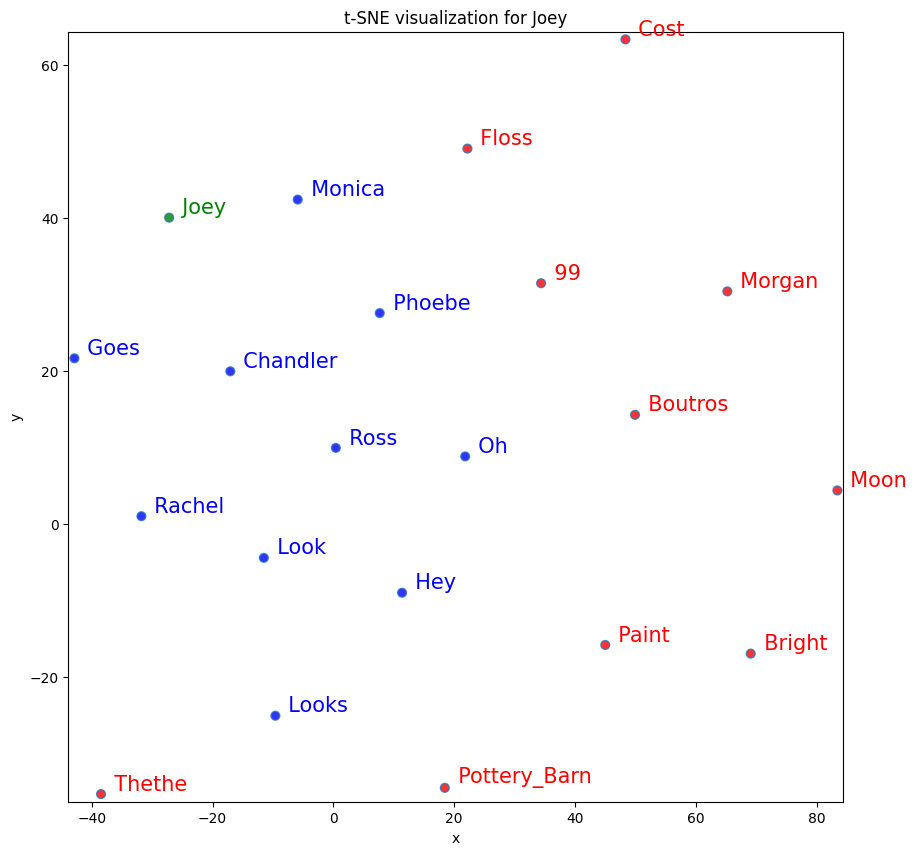

In [30]:
tsneplot(w2v, 'joey')

## **Task 2: Questions on the Conceptual Level (non-programming) (Grade (2 + 1 + 1 + 4) = 8)**

### Subtask 1: For gradient descent, what advantage has a decaying learning rate?

Advantage of a decaying learning rate: balancing convergence speed and precision. 

Initially, a higher learning rate allows for rapid progress in descending the loss landscape. As training progresses, a decaying learning rate reduces the step size, enabling the algorithm to converge more accurately in the vicinity of the minimum. 

This adaptive adjustment helps avoid overshooting the optimal point and aids in navigating complex, irregular loss surfaces more effectively, improving the overall convergence and fine-tuning of the model.

### Subtask 2: Why is it easier to maximize the log likelihood instead of the "normal" likelihood?

Because log likelihood simplifies computations and avoids numerical precision issues. 

Taking the log likelihood transforms products into sums, making calculations more numerically stable. Additionally, the log likelihood retains the same critical points as the original likelihood, simplifying optimization. 

This log transformation enhances the efficiency and stability of optimization algorithms, making it easier to find the maximum likelihood estimates in statistical models.

### Subtask 3: Name one advantage that fastText has over Word2Vec?

One advantage of fastText over Word2Vec is its ability to handle out-of-vocabulary words efficiently. 

fastText represents words as bags of character n-grams, allowing it to generate embeddings for words that were not seen during training, based on their subword components. This makes fastText more robust when dealing with rare or unseen words.

### Subtask 4: Compute the partial derivate of softmax loss for word2vec with

---

respect to the center word vector.
$$ \frac{\partial J}{\partial v_c} =\frac{\partial}{\partial v_c}\left[ -log \left( \frac{exp(u^T_o v_c)}{\Sigma_{w \in Vocab} exp(u^T_o v_c)} \right)\right] $$
use $U$ to denote the matrix of all embeddings and $y$ for a one-hot vector with a 1 for the true outside word $o$, and $\hat{y}$ for the predicted distribution $P(w|c)$.

**Given softmax loss function:**
    $$ J = -log \left( \frac{exp(u^T_o v_c)}{\Sigma_{w \in Vocab} exp(u^T_o v_c)} \right) $$
    
**Goal: Compute the partial derivative of $J$ with respect to the center word vector:** $\frac{\partial J}{\partial v_c}$

1. **Softmax Function:**
   $$ \text{Softmax}(u_w^T v_c) = \frac{\exp(u_w^T v_c)}{\sum_{w' \in \text{Vocab}} \exp(u_{w'}^T v_c)} $$

2. **Partial Derivative with Respect to $ v_c $:**
   $$ \frac{\partial}{\partial v_c} \text{Softmax}(u_w^T v_c) = \text{Softmax}(u_w^T v_c) \cdot u_w - \sum_{w' \in \text{Vocab}} \text{Softmax}(u_{w'}^T v_c) \cdot u_{w'} $$

3. **Apply the Result to Softmax Loss Function:**
   $$ \frac{\partial J}{\partial v_c} = -\left( \text{Softmax}(u_o^T v_c) \cdot u_o - \sum_{w' \in \text{Vocab}} \text{Softmax}(u_{w'}^T v_c) \cdot u_{w'} \right) $$

4. **Simplify the Expression:**
   $$ \frac{\partial J}{\partial v_c} = \sum_{w' \in \text{Vocab}} \text{Softmax}(u_{w'}^T v_c) \cdot u_{w'} - \text{Softmax}(u_o^T v_c) \cdot u_o $$

5. **Express in Terms of Predicted and True Distributions:**
   $$ \frac{\partial J}{\partial v_c} = \sum_{w' \in \text{Vocab}} \hat{y}_{w'} \cdot u_{w'} - y $$

6. **Incorporate Matrix \( U \):**
   $$ \frac{\partial J}{\partial v_c} = U \cdot (\hat{y} - y) $$

Here, $ U $ is the matrix of all word vectors, 

$\hat{y}$ is the predicted probability distribution over the vocabulary obtained from the softmax function, 

and $ y$ is the one-hot encoded vector for the true outside word.

## **Task 3: Auto-Complete Feature (Grade (2 + 6 + 4) = 12)**


### Subtask 1: Load and Preprocess Data


In [31]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser","ner"])


with open("./twitter.txt", "r", encoding='utf-8') as f:
    data = f.read()
print("First 500 characters of the data:")
display(data[0:500])
print("-------")

First 500 characters of the data:


"How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.\nWhen you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.\nthey've decided its more fun if I don't.\nSo Tired D; Played Lazer Tag & Ran A LOT D; Ughh Going To Sleep Like In 5 Minutes ;)\nWords from a complete stranger! Made my birthday even better :)\nFirst Cubs game ever! Wrigley field is gorgeous. This is perfect. Go Cubs Go!\ni no! i ge"

-------


In [32]:
sentences = data.split('\n')
sentences = [x.strip() for x in sentences if len(x)>0]

In [33]:
tokenized_corpus = []# list of list of the tokens in a sentence
##Your Code###
for sentence in sentences:
    lower_sen = sentence.lower()
    doc_3 = nlp(lower_sen)
    word_list = [word.text for word in doc_3]
    tokenized_corpus.append(word_list)

/Users/huqiaowen/Library/Python/3.8/lib/python/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [34]:
from random import Random

Random(4).shuffle(tokenized_corpus)

train_len = int(0.8*len(tokenized_corpus))

# train = sample(tokenized_corpus, train_len)##Your Code###
# test = [x for x in tokenized_corpus if x not in train]##Your Code###
train = tokenized_corpus[:train_len]
test = tokenized_corpus[train_len:]


In [35]:
from collections import Counter
flatten_corpus = [item for row in train for item in row]### Flatten the train corpus ###
word_counts = Counter(flatten_corpus)### count the number of each token ###
vocab = [x[0] for x in word_counts.items() if x[1]>1]

### keep only the ones with frequency bigger than 2 ###
print(len(vocab)) ### should be 14861 ###
train_replaced = []
test_replaced = []
for sentence in train:
    temp_train = []
    for w_num,word in enumerate(sentence):
        if word not in vocab:
            temp_train.append('<unk>')
        else:
            temp_train.append(word)
    train_replaced.append(temp_train)
            
    ### adjust the sentence to contain the word in the vocabulary and <unk> for the rest ####
for sentence in test:
    temp_test = []
    for w_num,word in enumerate(sentence):
        if word not in vocab:
            temp_test.append('<unk>')
        else:
            temp_test.append(word)
    test_replaced.append(temp_test)

14812


### Subtask 2: N-gram Based Language Model:


In [36]:
def n_grams_counts(corpus, n):
    """
    Count all n-grams in the corpus given the parameter n

    data: List of lists of words (your tokenized corpus)
    n: n in the n-gram

    Returns: A dictionary that maps a tuple of n words to its frequency
    """
    start_token='<s>'
    end_token = '<e>'
    n_grams = defaultdict(int)
    for sentence in corpus:
        sentence = [start_token]+sentence+[end_token]### add start and end token ###
        # convert list to tuple so it can be used a the key in the dictionary
        sentence = tuple(sentence)
        for i in range(n,len(sentence)):
            n_grams[sentence[i-n:i]]+=1
        ###iterate over the n-grams in the sentence, you can use the range() function, and increament the counts in the
        ## n_grams dictionary, where the key is the n_gram and the value is count
    return n_grams


In [37]:
def probability(word, prev_n_gram,
                         n_gram_cnts, plus_current_gram_cnts, vocab_size):
    """
    Estimate the probabilities of the next word using the n-gram counts with k-smoothing
    word: next word
    prev_n_gram: previous n gram
    n_gram_cnts: dictionary of counts of n-grams
    plus_current_gram_cnts: dictionary of counts of (n+1)-grams -> current word+ n-gram = (n+1)-gram
    vocab_size: number of words in the vocabulary

    Returns: A probability
    """
    k=1.0
    prev_n_gram = tuple(prev_n_gram)

    prev_n_gram_cnt =  n_gram_cnts[prev_n_gram]# get the previous n-gram count from the dictionary
    denominator = prev_n_gram_cnt+k*vocab_size# denominator with the previous n-gram count and k-smoothing
    plus_current_gram =  tuple(list(prev_n_gram)+[word])# add the current word to the n-gram
    plus_current_gram_cnts =  plus_current_gram_cnts[plus_current_gram]# get the current n-gram count using the dictionary
    numerator = plus_current_gram_cnts+k#calculate the numerator with k-smoothing
    prob = numerator/denominator

    return prob

In [38]:
def probabilities(prev_n_gram, n_gram_cnts, plus_current_gram_cnts, vocab):
    """
    Estimate the probabilities for all the words in the vocabulary given the previous n-gram
    prev_n_gram: previous n-gram
    n_gram_cnts: dictionary of counts of n-grams
    plus_current_gram_cntsplus_current_gram_cnt: dictionary of counts of (n+1)-grams -> current word+ n-gram = (n+1)-gram
    vocab: List of words

    Returns: A dictionary mapping from next words to the probability.
    """
    prev_n_gram = tuple(prev_n_gram)

    vocab = vocab+['<e>','<unk>']# add <e> <unk> to the vocabulary
    vocabulary_size = len(vocab)#compute the size

    probabilities = {}
    for word in vocab:
        ### compute the probability
        probabilities[word] = probability(word, prev_n_gram, n_gram_cnts, plus_current_gram_cnts, vocabulary_size)
    return probabilities

In [39]:
# Predict the probability of all possible words after the unigram "the"
sentences = [['the', 'moon', 'and', 'stars', 'are','shining','bright'],
             ['the', 'moon', 'is', 'shinnig','tonight'],
             ['mars','and' ,'moon', 'are', 'plants'],
             ['the' ,'moon', 'is','a', 'plant']]
unique_words = list(set(sentences[0] + sentences[1] + sentences[2]+ sentences[3]))
unigram_counts = n_grams_counts(sentences, 1)
bigram_counts = n_grams_counts(sentences, 2)
print("The word 'moon' should have the highest probability, if it is not the case, re-visit your previous functions.")
probabilities(["the"], unigram_counts, bigram_counts, unique_words)

The word 'moon' should have the highest probability, if it is not the case, re-visit your previous functions.


{'moon': 0.21052631578947367,
 'stars': 0.05263157894736842,
 'shining': 0.05263157894736842,
 'mars': 0.05263157894736842,
 'plant': 0.05263157894736842,
 'bright': 0.05263157894736842,
 'a': 0.05263157894736842,
 'plants': 0.05263157894736842,
 'tonight': 0.05263157894736842,
 'are': 0.05263157894736842,
 'is': 0.05263157894736842,
 'the': 0.05263157894736842,
 'and': 0.05263157894736842,
 'shinnig': 0.05263157894736842,
 '<e>': 0.05263157894736842,
 '<unk>': 0.05263157894736842}

### Subtask 3: Evaluation

In [40]:
def perplexity(sentence, n_gram_cnts, plus_current_gram_cnts, vocab_size, k=1.0):
    """
    Calculate perplexity for a list of sentences
    sentence: List of strings
    n_gram_cnts: dictionary of counts of n-grams
    plus_current_gram_cnts: dictionary of counts of (n+1)-grams -> current word+ n-gram = (n+1)-gram
    vocab_size: number of unique words in the vocabulary
    k: positive smoothing constant

    Returns: Perplexity score for a single sentence
    """

    n =  len(list(bigram_counts.keys())[0])# get the number 'n' in  n-gram  from n_gram_cnts

    sentence = ['<s>'] + sentence + ['<e>']# prepend <s> and append <e>
    sentence = tuple(sentence)
    N =len(sentence)# length of sentence


    product_pi = 1.0

    ### Compute the product of probabilities ###

    for t in range(n, N):
        n_gram = sentence[t-n:t] # get the n-gram before the predicted word (n-gram before t )
        word =  sentence[t] # get the word to be predicted (position t)
        prob = probability(word, n_gram, n_gram_cnts, plus_current_gram_cnts, vocab_size) # your code instead of ....
        product_pi *= (1.0/prob) # Update the product of the probabilities

    perplexity = product_pi**(1/float(N)) # Take the Nth root of the product
    return perplexity

In [41]:
bigram_counts = n_grams_counts(train_replaced, 2)### your code ###
trigram_counts = n_grams_counts(train_replaced, 3)### your code ###

perplexity_train = perplexity(train_replaced[0],bigram_counts, trigram_counts,len(vocab))
print(f"Perplexity for first train sample: {perplexity_train:.4f}")

perplexity_test = perplexity(test_replaced[0],bigram_counts, trigram_counts,len(vocab))
print(f"Perplexity for test sample: {perplexity_test:.4f}")# the perplexity for the train sample should be much lower

Perplexity for first train sample: 320.1705
Perplexity for test sample: 3180.8070


In [42]:
def suggest_a_word(up_to_here, n_gram_cnts, plus_current_gram_cnts, vocab , start_with=None):
    """
    Get suggestion for the next word
    up_to_here: the sentence so far, must have length > n
    n_gram_cnts: dictionary of counts of n-grams
    plus_current_gram_cnts: dictionary of counts of (n+1)-grams -> current word+ n-gram = (n+1)-gram
    vocab: List of words
    start_with: If not None, specifies the first few letters of the next word

    Returns: (most likely next word,  probability)
    """
    n = len(list(n_gram_cnts.keys())[0]) # get the number 'n' in  n-gram  from n_gram_cnts

    previous_n_gram = up_to_here[-n:] # get the last 'n' words as the previous n-gram from the input sentence


    probabs = probabilities(previous_n_gram, n_gram_cnts, plus_current_gram_cnts, vocab)# Estimate the probabilities for each word in the vocabulary

    probabs = sorted([x for x in probabs.items() if (start_with is not None and x[0].startswith(start_with)) or (start_with is None)], key = lambda kv:-kv[1])[0]
    ### sort the probability for higher to lower and return the highest probability word,probability tuple
    #if start_with is specified then return the highest probability word that starts with that specific character

    return probabs
    


In [43]:
previous_tokens=['i','like']
start_with='b'
suggestion = suggest_a_word(previous_tokens, bigram_counts,trigram_counts, list(vocab),start_with=start_with)
suggestion

('better', 0.0001336809036829089)

In [44]:
previous_tokens=['i','like','to']
start_with=None
suggestion = suggest_a_word(previous_tokens, bigram_counts,trigram_counts, list(vocab),start_with=start_with)
suggestion

('see', 0.0006037027099543869)

In [45]:
previous_tokens=["hello", "my", "name", "is"]
start_with=None
suggestion = suggest_a_word(previous_tokens, bigram_counts,trigram_counts, list(vocab),start_with=start_with)
suggestion

('<unk>', 0.00047179348924984834)

In [46]:
previous_tokens=["hello", "my", "name", "is"]
start_with='a'
suggestion = suggest_a_word(previous_tokens, bigram_counts,trigram_counts, list(vocab),start_with=start_with)
suggestion

('allison', 0.00013479813978567096)

## **Task 4: Understanding GloVe (Grade (2 + 4.25 + 4 + 1.75) = 12)**

### Subtask 1: Cost function

1. The intuition behind the weighting scheme is to downweight the importance of very frequent word pairs in the training process.The rationale behind this is that the most frequent word pairs may not provide as much semantic information as less frequent ones. By incorporating this weighting, GloVe aims to give more emphasis to informative, less common word pairs during training.

2. Both models aim to learn vector representations for words, GloVe's focus is on capturing global co-occurrence statistics, and its objective function directly involves the counts of word co-occurrences. In contrast, Word2Vec's skip-gram focuses on local context prediction, with a softmax-based objective function that involves conditional probabilities. GloVe can be seen as a model that incorporates global information about word relationships, while Word2Vec skip-gram focuses on local context and has a more predictive nature.

### Subtask 2: Build Co-occurence matrix


In [47]:
import numpy as np
from scipy import sparse
from math import log
from itertools import chain
from collections import Counter
from tqdm import tqdm

In [48]:
def create_vocab(corpus):
    """
    Build a vocabulary containing the frequencies
    corpus: the list of tokenized lines form the corpus

    Returns  dictionaries `word` -> (index or unique identified), frequency)`
    and `word` -> (index or unique identified)
    and index or unique identified -> `word`
    and length of the vocab
    """

    word_count_dict = {} # word id to the number of time it appears
    id_to_word={} # mapping ids to words
    word_to_id={} # mapping words to ids
    ### you code goes here###
    word_index = 0  # initialize word index counter

    for line in corpus:
        for word in line:
            if word not in word_to_id:
                # Assign a unique identifier to a new word
                word_to_id[word] = word_index
                id_to_word[word_index] = word
                word_index += 1

            # Increment word count in the word_count_dict
            word_id = word_to_id[word]
            if word_id in word_count_dict:
                word_count_dict[word_id] += 1
            else:
                word_count_dict[word_id] = 1


    return word_count_dict,id_to_word,word_to_id, len(word_count_dict)

In [49]:
word_count_dict, id_to_word,word_to_id, vocab_size=create_vocab(new_lines)

In [50]:
print("number of occurrences for joey:",word_count_dict[word_to_id['joey']])
print("number of occurrences for central perk:",word_count_dict[word_to_id['central_perk']])
print("vocab size is:",vocab_size)

number of occurrences for joey: 1829
number of occurrences for central perk: 34
vocab size is: 17773


In [51]:
def calculate_weight(cooccurrences, context_word_ids, center_word_id, side):
    """
    Calculate the weight in the co-occurrence matrix based on the distance of a word
    to the center word
    sentence = [I, went, to, the, bank]
    Let the center word be "to" and window size = 2
    left_context = [I, went]
    right_context = [the, bank]

    Weights:
    1/distance -> `went` and `the` have a weight of 1, and `I` and `bank` have a weight of 1/2
    """

    if side == "right_context":
        context_word_ids.reverse()

    # Calculate the distance of each context word to the center word
    distances = [abs(center_word_id - context_id) for context_id in context_word_ids]

    # Adjust the weight of the matrix to 1/distance between the center word and context word
    for i, context_id in enumerate(context_word_ids):
        weight = 1 / max(1, distances[i])  # Avoid division by zero
        cooccurrences[center_word_id, context_id] = weight

    return cooccurrences

In [52]:
cooccurrences = sparse.lil_matrix((10, 10),dtype=np.float64)
calculate_weight(cooccurrences, [1,3,5], 0, side="right_context")
print("weight of id=0 to id=1 :",cooccurrences[0,1])

weight of id=0 to id=1 : 1.0


In [53]:
from scipy import sparse
import numpy as np
from collections import Counter

def build_cooccur(corpus, window_size=3, min_count=5):
    """
    Create a co-occurrence matrix given a corpus
    corpus: the list of tokenized lines from the corpus
    window_size: how many words to right and left to consider

    Returns the co-occurrence sparse matrix
    """
    vocab, id_to_word, word_to_id, vocab_size = create_vocab(corpus)

    # sparse lil_matrix is optimized to operate on matrices that mostly have zeros.
    cooccurrences = sparse.lil_matrix((vocab_size, vocab_size), dtype=np.float64)

    for i, line in enumerate(corpus):
        # Get the ID of words from the vocab dictionary
        word_ids = [word_to_id[word] for word in line]

        for i, center_word_id in enumerate(word_ids):
            # Define left and right context windows
            left_context_word_ids = word_ids[max(0, i - window_size):i]
            right_context_word_ids = word_ids[i + 1:i + 1 + window_size]

            # Update the matrix based on the distance weights on both sides
            cooccurrences = calculate_weight(cooccurrences, left_context_word_ids, center_word_id, "left_context")
            cooccurrences = calculate_weight(cooccurrences, right_context_word_ids, center_word_id, "right_context")

    # Iterate through the Lil-matrix and filter out co-occurrences with counts below min_count
    cooccurrences_tuples = []
    for i, (row, data) in enumerate(zip(cooccurrences.rows, cooccurrences.data)):
        for j, weight in zip(row, data):
            distance = 1 / weight  # Convert weight back to distance
            if distance >= min_count:
                cooccurrences_tuples.append((i, j, weight))

    return cooccurrences_tuples


In [54]:
matrix=build_cooccur(new_lines, window_size=3, min_count=10)
matrix[103]

(0, 784, 0.0012755102040816326)

### Subtask 3: Modelling and Training


In [55]:
np.random.seed(77)

def init_weights(vocab_size, hidden):
    # Each word has a center word vector and a context vector.
    W_center = np.random.randn(vocab_size, hidden)
    b_center = np.random.randn(vocab_size)
    W_context = np.random.randn(vocab_size, hidden)
    b_context = np.random.randn(vocab_size)

    return W_center, b_center, W_context, b_context

In [56]:
W_center, b_center, W_context, b_context=init_weights(100, 32)
print("check the shapes to make sure the matrices have correct sizes:")
print(W_center.shape)
print(b_center.shape)
print(W_context.shape)
print(b_context.shape)
print("Look at the value of this element and how it changes with back prob:")
print(W_center[0,1])

check the shapes to make sure the matrices have correct sizes:
(100, 32)
(100,)
(100, 32)
(100,)
Look at the value of this element and how it changes with back prob:
0.6615314728168009


In [57]:
def back_prop(W_center, b_center, W_context, b_context, matrix, x_max, vocab_size, learning_rate, alpha=0.75):
    """
    W_center, b_center: weight and bias of the center word
    W_context, b_context: weight and bias of the context word
    vocab_size: vocabulary size
    x_max: define our weighting function when computing the cost for two word pairs; see the GloVe paper for more
    details.
    matrix: co-occurrence matrix
    alpha: the power of x_max function
    learning_rate: learning rate for gradient descent
    """

    global_cost = 0

    for i, j, cooccurrence in matrix:
        weight = ((cooccurrence / x_max) ** alpha) if (cooccurrence < x_max) else 1

        # Compute inner component of the cost function J' = w_i^Tw_j + b_i + b_j - log(X_{ij})
        inner_cost = np.dot(W_center[i], W_context[j]) + b_center[i] + b_context[j] - np.log(cooccurrence)

        # Compute cost J = f(X_{ij}) (J')^2
        cost = weight * (inner_cost ** 2)

        # Accumulate global cost
        global_cost += cost

        # Compute gradients for word vectors
        grad_center = 2 * weight * inner_cost * W_context[j]
        grad_context = 2 * weight * inner_cost * W_center[i]

        # Compute gradients for bias terms
        grad_b_center = 2 * weight * inner_cost
        grad_b_context = 2 * weight * inner_cost

        # Update the weights using gradient descent
        W_center[i] -= learning_rate * grad_center
        W_context[j] -= learning_rate * grad_context
        b_center[i] -= learning_rate * grad_b_center
        b_context[j] -= learning_rate * grad_b_context

    return W_center, b_center, W_context, b_context, global_cost

In [58]:
test_matrix=[(0,1,1),(0,2,0.4),(0,3,0.9),(0,4,0.4)]
W_center, b_center, W_context, b_context, global_cost  =back_prop(W_center, b_center, W_context, b_context, test_matrix, x_max=10,  vocab_size=100, learning_rate=0.01)
print("cost:",global_cost)
print("changed value:")
print(W_center[0,1])

cost: 7.878628410055489
changed value:
0.6858967911326566


In [59]:
def train_GloVe(matrix, vocab_size, epochs=10, learning_rate=0.0001, x_max=10, hidden_dim=100):
    """
    Train the GloVe model based on the co-occurrence matrix for a number of epochs
    matrix: co-occurrence matrix
    vocab_size: number of words in vocab
    epochs: number of passes through the data
    learning_rate: learning rate for back prop
    x_max: parameter of the weighting function
    hidden_dim: dimension of the vectors
    """
    W_center, b_center, W_context, b_context = init_weights(vocab_size, hidden_dim)

    for epoch in tqdm(range(epochs)):
        W_center, b_center, W_context, b_context, global_cost = back_prop(
            W_center, b_center, W_context, b_context, matrix, x_max, vocab_size, learning_rate
        )

        print(f"Epoch {epoch + 1}, Global Cost: {global_cost}")

    return W_center, W_context

In [60]:
W_center, W_context = train_GloVe(matrix, vocab_size, epochs=100, learning_rate=0.001, x_max=10, hidden_dim=100)


  1%|▉                                                                                        | 1/100 [00:08<14:47,  8.97s/it]

Epoch 1, Global Cost: 99310.96356145968


  2%|█▊                                                                                       | 2/100 [00:17<14:40,  8.98s/it]

Epoch 2, Global Cost: 98173.52959125135


  3%|██▋                                                                                      | 3/100 [00:27<14:34,  9.02s/it]

Epoch 3, Global Cost: 97063.3959433204


  4%|███▌                                                                                     | 4/100 [00:35<14:17,  8.93s/it]

Epoch 4, Global Cost: 95979.57171122594


  5%|████▍                                                                                    | 5/100 [00:44<14:04,  8.89s/it]

Epoch 5, Global Cost: 94921.11443642536


  6%|█████▎                                                                                   | 6/100 [00:53<13:55,  8.88s/it]

Epoch 6, Global Cost: 93887.12713802027


  7%|██████▏                                                                                  | 7/100 [01:02<13:44,  8.86s/it]

Epoch 7, Global Cost: 92876.75556031878


  8%|███████                                                                                  | 8/100 [01:11<13:34,  8.86s/it]

Epoch 8, Global Cost: 91889.18561966298


  9%|████████                                                                                 | 9/100 [01:19<13:24,  8.84s/it]

Epoch 9, Global Cost: 90923.64103384661


 10%|████████▊                                                                               | 10/100 [01:28<13:16,  8.85s/it]

Epoch 10, Global Cost: 89979.38111891304


 11%|█████████▋                                                                              | 11/100 [01:37<13:08,  8.86s/it]

Epoch 11, Global Cost: 89055.6987396827


 12%|██████████▌                                                                             | 12/100 [01:46<13:00,  8.87s/it]

Epoch 12, Global Cost: 88151.91840160094


 13%|███████████▍                                                                            | 13/100 [01:55<12:50,  8.86s/it]

Epoch 13, Global Cost: 87267.39447248152


 14%|████████████▎                                                                           | 14/100 [02:04<12:43,  8.88s/it]

Epoch 14, Global Cost: 86401.50952403077


 15%|█████████████▏                                                                          | 15/100 [02:13<12:36,  8.90s/it]

Epoch 15, Global Cost: 85553.67278370532


 16%|██████████████                                                                          | 16/100 [02:22<12:25,  8.88s/it]

Epoch 16, Global Cost: 84723.31868839613


 17%|██████████████▉                                                                         | 17/100 [02:31<12:19,  8.91s/it]

Epoch 17, Global Cost: 83909.90553219657


 18%|███████████████▊                                                                        | 18/100 [02:39<12:07,  8.87s/it]

Epoch 18, Global Cost: 83112.91420111034


 19%|████████████████▋                                                                       | 19/100 [02:48<11:59,  8.88s/it]

Epoch 19, Global Cost: 82331.84698823691


 20%|█████████████████▌                                                                      | 20/100 [02:57<11:48,  8.85s/it]

Epoch 20, Global Cost: 81566.2264834908


 21%|██████████████████▍                                                                     | 21/100 [03:06<11:41,  8.89s/it]

Epoch 21, Global Cost: 80815.59453239091


 22%|███████████████████▎                                                                    | 22/100 [03:15<11:31,  8.86s/it]

Epoch 22, Global Cost: 80079.51125895367


 23%|████████████████████▏                                                                   | 23/100 [03:24<11:20,  8.84s/it]

Epoch 23, Global Cost: 79357.55414806573


 24%|█████████████████████                                                                   | 24/100 [03:33<11:12,  8.85s/it]

Epoch 24, Global Cost: 78649.31718318704


 25%|██████████████████████                                                                  | 25/100 [03:41<11:03,  8.85s/it]

Epoch 25, Global Cost: 77954.41003545912


 26%|██████████████████████▉                                                                 | 26/100 [03:50<10:53,  8.83s/it]

Epoch 26, Global Cost: 77272.45730067545


 27%|███████████████████████▊                                                                | 27/100 [03:59<10:53,  8.95s/it]

Epoch 27, Global Cost: 76603.097780813


 28%|████████████████████████▋                                                               | 28/100 [04:08<10:44,  8.96s/it]

Epoch 28, Global Cost: 75945.98380715885


 29%|█████████████████████████▌                                                              | 29/100 [04:17<10:34,  8.94s/it]

Epoch 29, Global Cost: 75300.78060214227


 30%|██████████████████████████▍                                                             | 30/100 [04:26<10:31,  9.02s/it]

Epoch 30, Global Cost: 74667.1656773729


 31%|███████████████████████████▎                                                            | 31/100 [04:35<10:19,  8.98s/it]

Epoch 31, Global Cost: 74044.8282654393


 32%|████████████████████████████▏                                                           | 32/100 [04:44<10:09,  8.96s/it]

Epoch 32, Global Cost: 73433.46878331894


 33%|█████████████████████████████                                                           | 33/100 [04:53<09:57,  8.92s/it]

Epoch 33, Global Cost: 72832.79832534828


 34%|█████████████████████████████▉                                                          | 34/100 [05:03<10:03,  9.14s/it]

Epoch 34, Global Cost: 72242.53818375901


 35%|██████████████████████████████▊                                                         | 35/100 [05:12<10:04,  9.30s/it]

Epoch 35, Global Cost: 71662.41939519986


 36%|███████████████████████████████▋                                                        | 36/100 [05:22<10:06,  9.47s/it]

Epoch 36, Global Cost: 71092.18231147797


 37%|████████████████████████████████▌                                                       | 37/100 [05:33<10:19,  9.84s/it]

Epoch 37, Global Cost: 70531.57619304929


 38%|█████████████████████████████████▍                                                      | 38/100 [05:44<10:23, 10.06s/it]

Epoch 38, Global Cost: 69980.35882390397


 39%|██████████████████████████████████▎                                                     | 39/100 [05:53<10:05,  9.92s/it]

Epoch 39, Global Cost: 69438.29614643489


 40%|███████████████████████████████████▏                                                    | 40/100 [06:03<09:50,  9.84s/it]

Epoch 40, Global Cost: 68905.16191519449


 41%|████████████████████████████████████                                                    | 41/100 [06:13<09:42,  9.87s/it]

Epoch 41, Global Cost: 68380.73736830521


 42%|████████████████████████████████████▉                                                   | 42/100 [06:22<09:21,  9.67s/it]

Epoch 42, Global Cost: 67864.81091552005


 43%|█████████████████████████████████████▊                                                  | 43/100 [06:32<09:13,  9.71s/it]

Epoch 43, Global Cost: 67357.17784199785


 44%|██████████████████████████████████████▋                                                 | 44/100 [06:41<08:52,  9.50s/it]

Epoch 44, Global Cost: 66857.64002674552


 45%|███████████████████████████████████████▌                                                | 45/100 [06:50<08:41,  9.48s/it]

Epoch 45, Global Cost: 66366.00567500512


 46%|████████████████████████████████████████▍                                               | 46/100 [07:00<08:31,  9.46s/it]

Epoch 46, Global Cost: 65882.08906371416


 47%|█████████████████████████████████████████▎                                              | 47/100 [07:09<08:20,  9.44s/it]

Epoch 47, Global Cost: 65405.710299321545


 48%|██████████████████████████████████████████▏                                             | 48/100 [07:18<08:09,  9.42s/it]

Epoch 48, Global Cost: 64936.69508721784


 49%|███████████████████████████████████████████                                             | 49/100 [07:28<08:01,  9.44s/it]

Epoch 49, Global Cost: 64474.87451220834


 50%|████████████████████████████████████████████                                            | 50/100 [07:37<07:53,  9.47s/it]

Epoch 50, Global Cost: 64020.08482933029


 51%|████████████████████████████████████████████▉                                           | 51/100 [07:47<07:38,  9.36s/it]

Epoch 51, Global Cost: 63572.167264497046


 52%|█████████████████████████████████████████████▊                                          | 52/100 [07:56<07:28,  9.35s/it]

Epoch 52, Global Cost: 63130.96782441234


 53%|██████████████████████████████████████████████▋                                         | 53/100 [08:05<07:13,  9.23s/it]

Epoch 53, Global Cost: 62696.33711523346


 54%|███████████████████████████████████████████████▌                                        | 54/100 [08:14<07:03,  9.20s/it]

Epoch 54, Global Cost: 62268.130169585376


 55%|████████████████████████████████████████████████▍                                       | 55/100 [08:23<06:57,  9.28s/it]

Epoch 55, Global Cost: 61846.20628136289


 56%|█████████████████████████████████████████████████▎                                      | 56/100 [08:33<06:49,  9.30s/it]

Epoch 56, Global Cost: 61430.428848013165


 57%|██████████████████████████████████████████████████▏                                     | 57/100 [08:42<06:45,  9.44s/it]

Epoch 57, Global Cost: 61020.6652198566


 58%|███████████████████████████████████████████████████                                     | 58/100 [08:53<06:43,  9.62s/it]

Epoch 58, Global Cost: 60616.786556083716


 59%|███████████████████████████████████████████████████▉                                    | 59/100 [09:02<06:28,  9.47s/it]

Epoch 59, Global Cost: 60218.66768707577


 60%|████████████████████████████████████████████████████▊                                   | 60/100 [09:11<06:16,  9.41s/it]

Epoch 60, Global Cost: 59826.18698276088


 61%|█████████████████████████████████████████████████████▋                                  | 61/100 [09:21<06:12,  9.56s/it]

Epoch 61, Global Cost: 59439.22622664166


 62%|██████████████████████████████████████████████████████▌                                 | 62/100 [09:31<06:04,  9.60s/it]

Epoch 62, Global Cost: 59057.6704952565


 63%|███████████████████████████████████████████████████████▍                                | 63/100 [09:40<05:51,  9.50s/it]

Epoch 63, Global Cost: 58681.40804275987


 64%|████████████████████████████████████████████████████████▎                               | 64/100 [09:49<05:37,  9.38s/it]

Epoch 64, Global Cost: 58310.33019042949


 65%|█████████████████████████████████████████████████████████▏                              | 65/100 [09:58<05:30,  9.44s/it]

Epoch 65, Global Cost: 57944.33122077209


 66%|██████████████████████████████████████████████████████████                              | 66/100 [10:08<05:19,  9.41s/it]

Epoch 66, Global Cost: 57583.308276063355


 67%|██████████████████████████████████████████████████████████▉                             | 67/100 [10:17<05:09,  9.38s/it]

Epoch 67, Global Cost: 57227.16126108564


 68%|███████████████████████████████████████████████████████████▊                            | 68/100 [10:26<04:56,  9.26s/it]

Epoch 68, Global Cost: 56875.792749876455


 69%|████████████████████████████████████████████████████████████▋                           | 69/100 [10:36<04:50,  9.36s/it]

Epoch 69, Global Cost: 56529.10789625563


 70%|█████████████████████████████████████████████████████████████▌                          | 70/100 [10:45<04:38,  9.29s/it]

Epoch 70, Global Cost: 56187.0143479915


 71%|██████████████████████████████████████████████████████████████▍                         | 71/100 [10:54<04:28,  9.27s/it]

Epoch 71, Global Cost: 55849.42216442268


 72%|███████████████████████████████████████████████████████████████▎                        | 72/100 [11:03<04:17,  9.19s/it]

Epoch 72, Global Cost: 55516.24373735536


 73%|████████████████████████████████████████████████████████████████▏                       | 73/100 [11:12<04:08,  9.19s/it]

Epoch 73, Global Cost: 55187.39371510341


 74%|█████████████████████████████████████████████████████████████████                       | 74/100 [11:21<03:59,  9.19s/it]

Epoch 74, Global Cost: 54862.78892952013


 75%|██████████████████████████████████████████████████████████████████                      | 75/100 [11:30<03:47,  9.11s/it]

Epoch 75, Global Cost: 54542.34832587596


 76%|██████████████████████████████████████████████████████████████████▉                     | 76/100 [11:40<03:42,  9.26s/it]

Epoch 76, Global Cost: 54225.99289546644


 77%|███████████████████████████████████████████████████████████████████▊                    | 77/100 [11:50<03:35,  9.37s/it]

Epoch 77, Global Cost: 53913.6456108015


 78%|████████████████████████████████████████████████████████████████████▋                   | 78/100 [11:59<03:26,  9.36s/it]

Epoch 78, Global Cost: 53605.23136330093


 79%|█████████████████████████████████████████████████████████████████████▌                  | 79/100 [12:08<03:16,  9.36s/it]

Epoch 79, Global Cost: 53300.676903340274


 80%|██████████████████████████████████████████████████████████████████████▍                 | 80/100 [12:17<03:06,  9.30s/it]

Epoch 80, Global Cost: 52999.91078255324


 81%|███████████████████████████████████████████████████████████████████████▎                | 81/100 [12:27<02:56,  9.29s/it]

Epoch 81, Global Cost: 52702.863298337514


 82%|████████████████████████████████████████████████████████████████████████▏               | 82/100 [12:36<02:45,  9.21s/it]

Epoch 82, Global Cost: 52409.46644037095


 83%|█████████████████████████████████████████████████████████████████████████               | 83/100 [12:46<02:40,  9.42s/it]

Epoch 83, Global Cost: 52119.653839155595


 84%|█████████████████████████████████████████████████████████████████████████▉              | 84/100 [12:55<02:28,  9.30s/it]

Epoch 84, Global Cost: 51833.36071642164


 85%|██████████████████████████████████████████████████████████████████████████▊             | 85/100 [13:04<02:18,  9.26s/it]

Epoch 85, Global Cost: 51550.52383737938


 86%|███████████████████████████████████████████████████████████████████████████▋            | 86/100 [13:13<02:09,  9.28s/it]

Epoch 86, Global Cost: 51271.08146465418


 87%|████████████████████████████████████████████████████████████████████████████▌           | 87/100 [13:22<01:59,  9.22s/it]

Epoch 87, Global Cost: 50994.973313922106


 88%|█████████████████████████████████████████████████████████████████████████████▍          | 88/100 [13:31<01:49,  9.12s/it]

Epoch 88, Global Cost: 50722.14051112236


 89%|██████████████████████████████████████████████████████████████████████████████▎         | 89/100 [13:41<01:41,  9.20s/it]

Epoch 89, Global Cost: 50452.52555118745


 90%|███████████████████████████████████████████████████████████████████████████████▏        | 90/100 [13:50<01:32,  9.24s/it]

Epoch 90, Global Cost: 50186.07225822936


 91%|████████████████████████████████████████████████████████████████████████████████        | 91/100 [13:59<01:23,  9.25s/it]

Epoch 91, Global Cost: 49922.72574714156


 92%|████████████████████████████████████████████████████████████████████████████████▉       | 92/100 [14:08<01:14,  9.27s/it]

Epoch 92, Global Cost: 49662.432386534936


 93%|█████████████████████████████████████████████████████████████████████████████████▊      | 93/100 [14:18<01:05,  9.36s/it]

Epoch 93, Global Cost: 49405.13976293417


 94%|██████████████████████████████████████████████████████████████████████████████████▋     | 94/100 [14:28<00:56,  9.43s/it]

Epoch 94, Global Cost: 49150.796646259056


 95%|███████████████████████████████████████████████████████████████████████████████████▌    | 95/100 [14:37<00:46,  9.29s/it]

Epoch 95, Global Cost: 48899.3529564439


 96%|████████████████████████████████████████████████████████████████████████████████████▍   | 96/100 [14:46<00:37,  9.26s/it]

Epoch 96, Global Cost: 48650.7597312058


 97%|█████████████████████████████████████████████████████████████████████████████████████▎  | 97/100 [14:56<00:28,  9.51s/it]

Epoch 97, Global Cost: 48404.96909492164


 98%|██████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [15:05<00:18,  9.44s/it]

Epoch 98, Global Cost: 48161.9342285258


 99%|███████████████████████████████████████████████████████████████████████████████████████ | 99/100 [15:14<00:09,  9.33s/it]

Epoch 99, Global Cost: 47921.609340436786


100%|███████████████████████████████████████████████████████████████████████████████████████| 100/100 [15:24<00:00,  9.24s/it]

Epoch 100, Global Cost: 47683.949638431965


In [61]:
from numpy.linalg import norm
# take the average of the learned vector as the final vector
W = np.add(W_center, W_context)/2
W = W.T
W = W/norm(W)

In [62]:
W.shape

(100, 17773)

In [63]:
# Generates word to word embedding dictionary
word_to_vector = {}
for word in word_to_id.keys():
    word_to_vector[word] = W[:, word_to_id[word]]

### Subtask 4: Compare to Skip-gram


In [64]:
def most_similar(word_vector, all_vectors, id_to_word, topk):
    """
    Function to find the top k most similar words to a word vector
    word_vector: vector of the search word
    all_vectors: all word vectors
    id_to_word: dictionary from id to words
    topk: number of elements to return
    """
    # Compute dot products between the search word vector and all other word vectors
    similarities = np.dot(all_vectors.T, word_vector)

    # Get indices of the top k most similar words
    topk_indices = np.argsort(similarities)[::-1][:topk]

    # Get the words corresponding to the top k indices
    topk_words = [id_to_word[idx] for idx in topk_indices]

    return topk_words

In [65]:
most_similar(word_to_vector["central_perk"],W,id_to_word,5)

['central_perk', 'uhuh', 'stuttering', 'laughable', 'selfrespecting']

In [66]:
most_similar(word_to_vector["joey"],W,id_to_word,5)

['joey', 'super', 'protected', 'clickclocken', 'yahoos']

In [67]:
np.dot(word_to_vector["rachel"],word_to_vector["mrs_green"])

-1.81101219230722e-06

In [68]:
np.dot(word_to_vector["smelly_cat"],word_to_vector["song"])

-7.055559686379388e-06

In [69]:
np.dot(word_to_vector["ross"],word_to_vector["spaceship"])

-4.84005011160461e-06